# Répertoire des professeurs et principaux de la faculté des arts de Paris aux XVIIe et XVIIIe siècles – exploration des données

## Introduction

Les données utilisées dans cet exercice ont été produites par  Boris Noguès.


Boris Noguès, «Répertoire des professeurs et principaux de la faculté des arts de Paris aux XVIIe et XVIIIe siècles», novembre 2008 [en ligne] http://rhe.ish-lyon.cnrs.fr/?q=pfap (consulté le 12 Mai 2020)
Droits d'auteur : Creative Commons by-nc-sa 3.0 FR (http://creativecommons.org/licenses/by-nc-sa/3.0/fr/)




Préalablement à l'exploration avec ce carnet:

* Ouvrir le fichier Excel ('exemples/pfap.csv') dans Libre Office
* Sauvegarder une copie du fichier au format CSV
* Bien paramétrer la sortie CSV: encodage caractères UTF-8, ',' ou '|' comme séparateur de champ, '"' comme séparateur de châine de caractères

## Documentation Python

La finalité de l'exercice est d'apprendre à explorer un fichier au format CSV on utilisant les listes Python et outils associés.

Cf. ces pages:

* https://docs.python.org/3.6/library/csv.html
* https://docs.python.org/3.6/tutorial/introduction.html#lists
  
Ultérieurement on présentera les mêmes opérations effectuées avec la librairie Pandas

## Gestion des librairies

Utiliser l'environnement Conda : 'atelier', activer le kernel relatif

Cf. cette page de documentation : (wiki)

In [ ]:
import csv
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

import matplotlib.pyplot as plt

## Importation du fichier CSV

In [242]:
chemin_f = 'exemples/pfap.csv'
# chemin_f = 'exemples/pfap.xls'  -- > UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte

In [246]:
def print_n_rows(file, n):
    i = 0
    for row in file:
        if i < n:
            print(row)
        i += 1    
    return 'Done !'

In [250]:
csv_list = []
with open(chemin_f, 'r') as f:
    ### Documentation de sniffer -> mettre valeur plus élevée de caractères
    #  https://docs.python.org/3.6/library/csv.html#csv.Sniffer
    # dialect = csv.Sniffer().sniff(f.read(6000))
    delimiter = dialect.delimiter
    print(delimiter)
    f.seek(0) ### revenir au début du fichier
    csv_f = csv.reader(f, dialect ) ### delimiter=delimiter
    print_n_rows(csv_f, 5)
    
# dir(csv_f)

|
['Nom', 'Prénoms', 'naissance', 'décès', 'Nation', 'Diocèse', "Collège d'études", 'année de référence', 'Collège du premier poste', 'Fonction du premier poste', '1ère année attestée du 1er poste', 'date ultime attestée du 1er poste', 'Collège du deuxième poste', 'Fonction du deuxième poste', '1ère date attestée du deuxième poste', 'date ultime attestée du deuxième poste', 'Collège du troisème poste', 'Fonction du troisième poste', '1ère date attestée du troisième poste', 'Date ultime attestée du troisième poste', 'Autres informations', 'Premier grade connu', 'Second grade connu', 'Ordre sacré', 'Bénéfices', 'Engagement janséniste', 'Serment civique', 'Fonctions universitaires', 'Publications', 'Référence de la source 1', 'Référence de la source 2', 'Référence de la source 3', 'Autres références de source']
['Acher', 'Jean Baptiste', '', '', 'Normandie', 'Rouen', 'Lisieux (1758 en 2e, 1750 en 1ère, noté au concours général)', '1756', 'Lisieux', 'professeur de seconde', '1756', '1765',

In [187]:
csv_list = []
with open(chemin_f, 'r') as f:
    csv_f = csv.reader(f, delimiter='|')
    for r in csv_f:
        csv_list.append(r)

In [207]:
csv_list[0]

['Nom',
 'Prénoms',
 'naissance',
 'décès',
 'Nation',
 'Diocèse',
 "Collège d'études",
 'année de référence',
 'Collège du premier poste',
 'Fonction du premier poste',
 '1ère année attestée du 1er poste',
 'date ultime attestée du 1er poste',
 'Collège du deuxième poste',
 'Fonction du deuxième poste',
 '1ère date attestée du deuxième poste',
 'date ultime attestée du deuxième poste',
 'Collège du troisème poste',
 'Fonction du troisième poste',
 '1ère date attestée du troisième poste',
 'Date ultime attestée du troisième poste',
 'Autres informations',
 'Premier grade connu',
 'Second grade connu',
 'Ordre sacré',
 'Bénéfices',
 'Engagement janséniste',
 'Serment civique',
 'Fonctions universitaires',
 'Publications',
 'Référence de la source 1',
 'Référence de la source 2',
 'Référence de la source 3',
 'Autres références de source']

## Les 'Nations'

In [189]:
nations = []
for r in csv_list[1:]:
    nations.append(r[4].strip())

In [190]:
print(len(nations))
nations[:3]

1740


['Normandie', 'France', 'Normandie']

In [191]:
nations.sort()

In [192]:
counter_nations = Counter(nations)
grouped_nations = list(zip(counter_nations.keys(), counter_nations.values()))

In [193]:
grouped_nations = [[gn[0], gn[1]] if gn[0] else ['_no_value', gn[1]] for gn in grouped_nations]

In [194]:
grouped_nations

[['_no_value', 362],
 ['Allemagne', 21],
 ['France', 1031],
 ['Normandie', 240],
 ['Picardie', 86]]

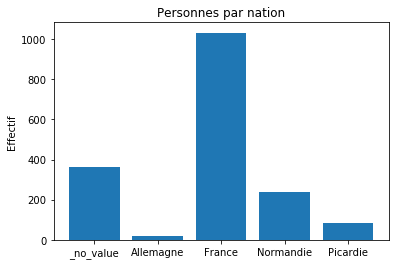

In [195]:
objects = [l[0] for l in grouped_nations]
eff = [l[1] for l in grouped_nations]

p1 = plt.bar(objects, eff) # , yerr=menStd

plt.ylabel('Effectif')
plt.title('Personnes par nation')
#plt.xticks(objects)
#plt.yticks(np.arange(0, 81, 10))
# plt.legend(eff)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.show()


## Exploration des dates de naissance

In [202]:
naissances = []
for r in csv_list[1:]:
    naissances.append(r[3].strip())

In [203]:
print(len(naissances))
naissances[:5]

1740


['', '', '1714', '1792', '']

In [204]:
naissances.sort()

In [205]:
values_naissances = ['_value' if n else '_no_value' for n in naissances]

In [206]:
counter_values_naissances = Counter(values_naissances)
counter_values_naissances

Counter({'_no_value': 1554, '_value': 186})

## Exploration des dates de référence

"La « 1ère date de référence » correspond à l’année de demande officielle d’une régence devant la nation (qui marque le début théorique de la carrière) ou bien, par défaut, la première année où l’exercice est attesté sur un poste, ou encore, en l’absence de l’une de ces deux informations, l’année où l’individu est mentionné pour la première fois dans une source. Si le contenu de la rubrique est donc hétérogène, ceci a semblé la moins mauvaise solution pour situer chronologiquement chaque individu, la présentation d’une notice sans aucune date étant exclue." (http://rhe.ish-lyon.cnrs.fr/?q=pfap)

In [208]:
annees_reference = []
for r in csv_list[1:]:
    ### manquent deux valeurs
    if r[7]:
        annees_reference.append(r[7].strip())

In [209]:
print(len(annees_reference))
annees_reference[:3]

1738


['1756', '1712', '1696']

In [210]:
annees_reference.sort()

In [211]:
max(annees_reference), min(annees_reference)

('1793', '1568')

In [212]:
counter_annees_reference = Counter(annees_reference)
grouped_annees_reference = list(zip(counter_annees_reference.keys(), counter_annees_reference.values()))

In [213]:
grouped_annees_reference = [[int(i[0]), i[1]] for i in grouped_annees_reference]
grouped_annees_reference[:5]

[[1568, 1], [1584, 1], [1588, 1], [1589, 1], [1590, 1]]

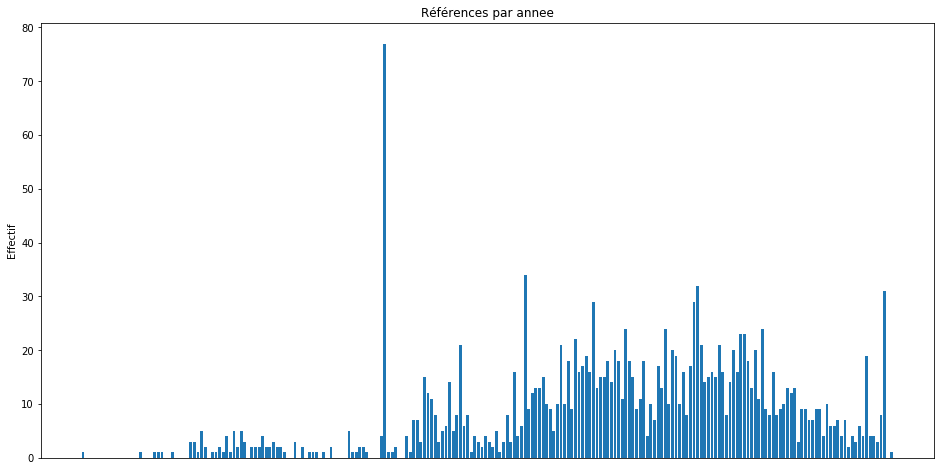

In [214]:
objects = [l[0] for l in grouped_annees_reference]
eff = [l[1] for l in grouped_annees_reference]

p1 = plt.bar(objects, eff) # , yerr=menStd

#plt.xticks('objects')
plt.ylabel('Effectif')
plt.title('Références par annee')
#plt.yticks(np.arange(0, 81, 10))
# plt.legend(eff)
plt.gcf().set_size_inches(16, 8)
plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.show()


In [215]:
### Documentation:
# https://stackoverflow.com/questions/6294179/how-to-find-all-occurrences-of-an-element-in-a-list
    
selected = [i for i in grouped_annees_reference if  i[1] > 30]
selected

[[1652, 77], [1691, 34], [1739, 32], [1791, 31]]

In [216]:
selected = [i for i in csv_list if i[7] == str(1652)]
[[i[0],i[1],i[8],i[9]] for i in selected[:5]]

[['Amoloy', '', 'Beauvais', 'professeur'],
 ['Aubert', '', 'La Marche', 'professeur'],
 ['Barbey (Barbay)', '', 'Reims', 'professeur de philosophie'],
 ['Baudier', '', 'Plessis', 'professeur de philosophie'],
 ['Belin', '', 'Beauvais', 'professeur']]

In [217]:
d_list = []
period = 20
d_start = 1551
i = 0
d_list = []
d_list.append(d_start)

while i < 12:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1

In [218]:
d_list

[1551, 1571, 1591, 1611, 1631, 1651, 1671, 1691, 1711, 1731, 1751, 1771, 1791]

In [219]:
i_list = []
for i in d_list:
    i_n = 0
    for l in grouped_annees_reference:
        if l[0] >= i and l[0] < (i + 20):
            i_n = i_n + l[1]
    i_list.append([i, i_n])        

In [220]:
i_list

[[1551, 1],
 [1571, 4],
 [1591, 30],
 [1611, 37],
 [1631, 18],
 [1651, 181],
 [1671, 113],
 [1691, 307],
 [1711, 294],
 [1731, 337],
 [1751, 258],
 [1771, 126],
 [1791, 32]]

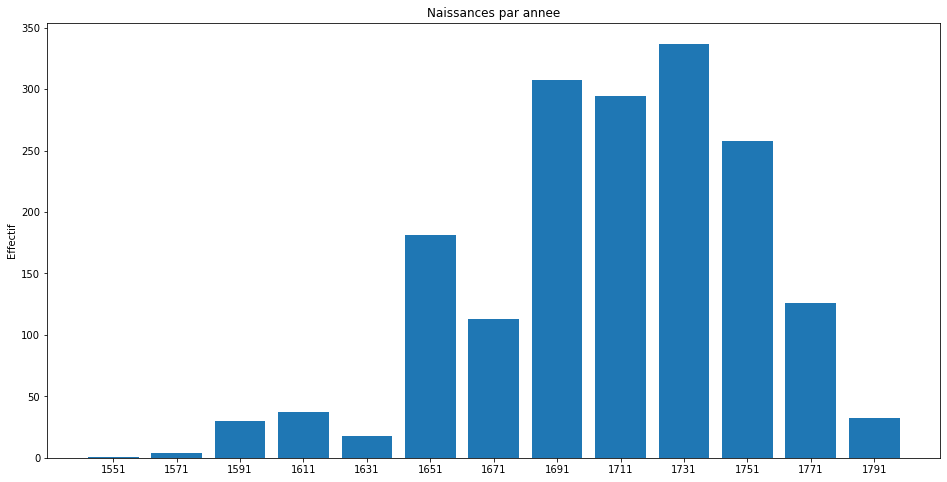

In [221]:
objects = [str(l[0]) for l in i_list]
eff = [l[1] for l in i_list]

p1 = plt.bar(objects, eff) # , yerr=menStd

plt.ylabel('Effectif')
plt.title('Naissances par annee')
#plt.xticks(objects)
#plt.yticks(np.arange(0, 81, 10))
# plt.legend(eff)
plt.gcf().set_size_inches(16, 8)
plt.gca().axes.get_xaxis().set_visible(True)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.show()
